In [1]:
import base64
from collections import deque
import os
import pathlib
import shutil

from IPython import display as ipydisplay
import torch

from utils_env import MyEnv
from utils_drl import Agent

import cv2

In [93]:
target = 53
model_name = f"model_{target:03d}"
model_path = f"./models/{model_name}"
device = torch.device("cpu")
env = MyEnv(device)
agent = Agent(env.get_action_dim(), device, 0.99, 0, 0, 0, 1, model_path)

In [94]:
obs_queue = deque(maxlen=5)
avg_reward, frames = env.evaluate(obs_queue, agent, render=True)
print(f"Avg. Reward: {avg_reward:.1f}")

!rm -r eval_*
target_dir = f"eval_{target:03d}"
os.mkdir(target_dir)
for ind, frame in enumerate(frames):
    frame.save(os.path.join(target_dir, f"{ind:06d}.png"), format="png")

Avg. Reward: 205.0


In [87]:
import time
# 图片合成视频
def pic2video(path,size):

    # cap = cv2.VideoCapture(0)
    file_dir = target_dir
    list = []
    for root ,dirs, files in os.walk(file_dir):
        for file in files:
            list.append(file)      # 获取目录下文件名列表
            
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')

    out = cv2.VideoWriter('output/test.avi',fourcc, 20.0, (160,210),True)
    
    for i in range(1,len(list)):
        #读取图片
        img = cv2.imread(target_dir+'/'+list[i-1])     
        # resize方法是cv2库提供的更改像素大小的方法
        # 160,210像素大小
        img = cv2.resize(img,(160,210))
        # 写入视频
        out.write(img)

    # cap.release()
    out.release()
    # cv2.destroyAllWindows()



In [88]:
path = r'output'
    # 需要转为视频的图片的尺寸,必须所有图片大小一样，不然无法合并成功
size = (160,210)
folder_name = target_dir
pic2video(target_dir,(160,210))

['4.3', '2.3', '2.7', '9.3', '10.7', '8.0', '10.3', '12.0', '18.3', '19.7', '22.7', '41.3', '26.7', '30.3', '39.7', '33.0', '31.0', '45.7', '45.7', '66.7', '46.3', '54.0', '47.3', '68.3', '39.0', '57.0', '61.0', '64.0', '79.0', '90.3', '49.0', '77.0', '74.3', '65.0', '77.0', '62.0', '92.0', '64.0', '173.7', '166.0', '55.3', '164.7', '126.3', '99.7', '62.7', '121.0', '82.7', '193.0', '144.7', '136.7', '46.0', '103.0', '85.0', '57.0', '150.0', '93.7']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55']


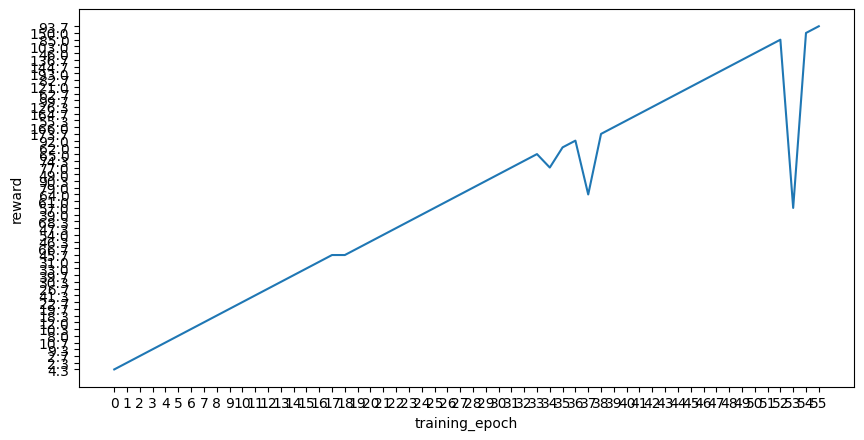

In [76]:
# coding=utf-8
import matplotlib.pyplot as plt

reward_y = []
epoch_x = []
try:
    file = open('rewards.txt', 'r')
except FileNotFoundError:
    print('File is not found')
else:
    lines = file.readlines()
    for line in lines:
        a = line.split()
        # print()
        y = a[2]
        reward_y.append(a[2])
        x = a[0]
        epoch_x.append(a[0])
file.close()
print(reward_y)
print(epoch_x)
plt.figure(figsize=(10, 5), dpi=100)
plt.xlabel("training_epoch")
plt.ylabel("reward")

plt.plot(epoch_x, reward_y)
plt.show()